In [59]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import norm, det, eig

# Матрицы

## 1. Базовая информация
Матрицы в общем случае это опрераторы, которые переводят элемент из пространства одной размерности в пространство другой размерности, например матрица $A (m\times n)$ переводит элемент $x(n, 1)$ в элемент $y(m, 1)$: $A(m, n) \times x(n, 1) = y(m, 1)$.

Для создания матриц в `python` сужествуют несколько вариантов:
1. Нулевая матрица: `np.zeros((3, 4))`
2. Единичная матрица: `np.ones((3, 4))`
3. Квадратная диагональная единичная матрица: `np.eye(3, dtype=float)`
4. Матрица с произвольными значениями: `np.array([[1, 2, 3], [4, 5, 6]])`

In [7]:
# как дополнительный пример создания матрицы
np.arange(1, 7, 1).reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

## 2. Основные типы матриц

**Диагональная матрица**: это матрица, у которой все элементы кроме тех что на диагонали равны 0.

Диагональная матрица задает соответственно растяжение-сжатие фигуры до преобразования вдоль соответствующих осей на значение элемента на диагонали.

<img src='img/matrix_ortogonal.png'/>

**Ортогональная матрица**: это матрица, для которой выполено условие: $AA^{T}=A^{T}A=I$.

Из определения сразу вытекает ряд свойств:
1. Ортогональная матрица обратима, причем $A^{-1}=A$
2. Орторональная матрица сохраняет скалярное произведение:
$$
    (Ax, Ay) = (Ax)^{T} (Ay)=x^{T}A^{T}Ay=x^{T}y=(x,y)
$$
3. Ортогональная матрица сохраняет длины векторов, так как сохраняется и скалярное произведение.

Ортогональная матрица задает соответственно вращение фигуры.

<img src='img/matrix_diagonal.png'/>

**Симметричная матрица**: матрица в  которой все элементы симметричны относительно главной диагонали.

**Теорема**: Любую симметричную матрицу $A$ можно представить в виде $A=Q\times D \times Q^{T}$, где $Q$ - ортогональная матрица, а $D$ - диагональная матрица.

Поэтому, симметричная матрица задает растяжение (как диагональная матрица) и поворот (как ортогональная матрица).

<img src='img/matrix_symmetrical.png'/>

## 3. Определитель матрицы и ранг

Очень выжным понятием для матрицы является определеитель

**Опр**: Определитель матрицы это выражение, которое для квадратной матрицы $A(2, 2)$ принимает вид (ограничимся только таким определением) (вычисляется с использованием `numpy.linalg.det`):

$$
    det A = a_{11}a_{22} - a_{12}a_{21}
$$

**Смысл определителя**: показывает объем $N$-метроно паралепипида, заданного матрицей $A$, те. $S = |det A|$.

Таким образом, определитель матрицы $A$ показывает как *количественно изменится площадь фигуры после преобразования этой фигуры при помощи выбранной матрицы $A$*.

Например, при преобразовании единичного квадрата, построенного на векторах `x=[0, 1].T` и `y=[1, 0].T` с помощью матрицы `A = [[1, 2], [3, 1]]` получим параллелограмм с площадью $S=5$, что говорит о том, что площадь единичного квадрата увеличилась в 5 раз. 
Докажем что это верно ниже:

In [25]:
x = np.array([0, 1, 1, 0]).reshape((2, 2))
A = np.array([1, 2, 3, 1]).reshape((2, 2))

y = A.dot(x)
angle =  np.arccos(np.dot(y[0, :], y[1, :]) / norm(y[0, :], ord=2) / norm(y[1, :], ord=2))
S_real = norm(y[0, :], ord=2) * norm(y[1, :], ord=2) * np.sin(angle)
S_det = np.abs(det(A))

print(r'Площадь после преобразования через школьную формулу: {0}'.format(round(S_real, 3)))
print(r'Площадь после преобразования через школьную формулу: {0}'.format(round(S_det, 3)))

Площадь после преобразования через школьную формулу: 5.0
Площадь после преобразования через школьную формулу: 5.0


**Некоторые свойства определителя**:
1. Определитель матрицы, содержащей линейно зависимые строки равен нулю. (в друхмерном пространстве это два вектора, лежащих на одной прямой - ясно что площадь такого параллелограмма будет равна нулю).

In [47]:
A = np.array([[1, 2, 3], [2, 5, 1], [2, 4, 6]]).reshape((3, 3))
# print('матрица A:\n {0}'.format(A))
print('Определитель матрицы A с двумя линейно зависимыми векторами: {0}'.format(det(A)))

Определитель матрицы A с двумя линейно зависимыми векторами: 0.0


2. Определитель матрицы не меняется при транспонировании, те. `det A = det A.T`

In [51]:
A = np.array([[1, 2, 3], [2, 5, 1], [1, 4, 3]]).reshape((3, 3))
# print('матрица A:\n {0}'.format(A))
print('Определитель матрицы A   : {0}'.format(round(det(A), 3)))
print('Определитель матрицы A.T : {0}'.format(round(det(A.T), 3)))

Определитель матрицы A   : 10.0
Определитель матрицы A.T : 10.0


3. Если $A$ и $B$ квадратные матрицы одного размера, то $det(A\times B) = det(a)\times det(B)$.

In [50]:
A = np.array([[1, 2, 3], [2, 5, 1], [1, 4, 3]]).reshape((3, 3))
B = np.array([[1, 5, 3], [2, 1, 1], [1, 2, 3]]).reshape((3, 3))

print('det(AB)       = {0}'.format(round(det(A.dot(B)), 3)))
print('det(A)*det(B) = {0}'.format(round(det(A)*det(B), 3)))

det(AB)       = -150.0
det(A)*det(B) = -150.0


## 4. Собственный вектора и значения




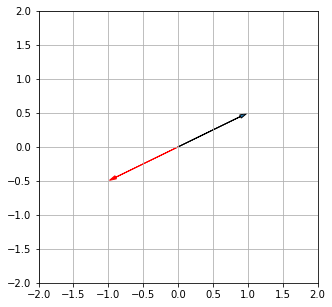

array([-0.89442719, -0.4472136 ])

In [80]:
A = np.array([-4, 6, -3, 5]).reshape((2, 2))
l, v = eig(A)

fig, ax = plt.subplots(figsize=(5, 5))

ax.arrow(0, 0, *v[:, 0], head_width=0.05, head_length=0.1, color='r')
new = A.dot(v[:, 0])
ax.arrow(0, 0, *new, head_width=0.05, head_length=0.1)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.grid(True)
plt.show()

v[:, 0]

## Системы линейных уравнений

